In [4]:
import pandas as pd

## Load Dataset

In [5]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing

In [6]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [8]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [9]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [11]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


## Splitting a dataset for the classifier

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [13]:
print(len(X_train))
print(len(X_test))

712
179


## Training the classifier

In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Evaluate model

In [16]:
model.score(X_test,y_test)

0.7486033519553073

## Visualization

[Text(0.47259535077951004, 0.9782608695652174, 'Sex <= 1.5\ngini = 0.468\nsamples = 712\nvalue = [446, 266]'),
 Text(0.1720837973273942, 0.9347826086956522, 'Age <= 13.0\ngini = 0.29\nsamples = 465\nvalue = [383, 82]'),
 Text(0.035634743875278395, 0.8913043478260869, 'Pclass <= 2.5\ngini = 0.496\nsamples = 35\nvalue = [16, 19]'),
 Text(0.026726057906458798, 0.8478260869565217, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.044543429844097995, 0.8478260869565217, 'Fare <= 20.825\ngini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(0.017817371937639197, 0.8043478260869565, 'Age <= 10.0\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.008908685968819599, 0.7608695652173914, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.026726057906458798, 0.7608695652173914, 'Age <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.017817371937639197, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.035634743875278395, 0.717391304347826, 'gini = 0.0\nsamples

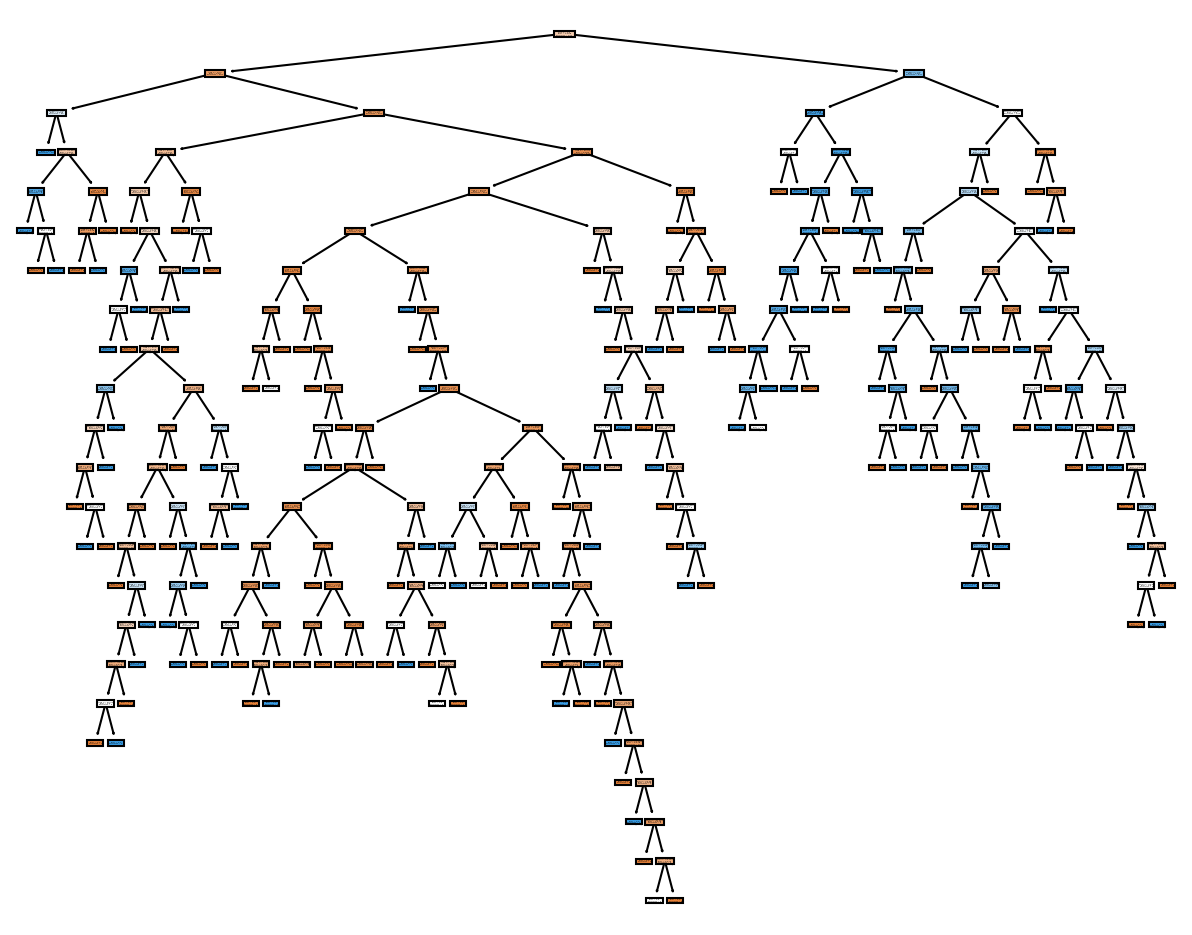

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=inputs.columns, filled=True)